### Setup

In [ ]:
!pip install -U -q PyDrive
!pip install -q anndata
!pip install -q scanpy
!pip install -q paste-bio
!pip install -q plotly
!pip install -q POT==0.8.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.1/671.1 kB 8.7 MB/s eta 0:00:00


Authenticating Google Drive to download files

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = '1Emm9eRKYAdc1kwpI4_RWqJAsXwY5BnLK'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1_coords.csv')

id = '1uQ3OcOvgznBd0-YAyFM5IMm-9Atb0PMX'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice1.h5')

id = '1Tix0CRW20diWZ9Y3Q4TvUa86CvUY6Gui'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2_coords.csv')

id = '12FJ8ph0MN4sNWqQQe1G4vrZNi05mf6Fx'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice2.h5')

id = '1MQt_AyKssgWpXV64vYtQLO5SlYDUilSu'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3_coords.csv')

id = '1AQqbuLcfHc3hwsTrDVPyH_5Bdfsb9Z_b'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice3.h5')

id = '1-zQsQbP0GXol0RuICGHp3tiaLQkfSFy-'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4_coords.csv')

id = '1iAEX8wrO49KldN1Zct928vHSEDeX2gzm'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice4.h5')

id = '19J4fxCvPaotiFS6mMBPW48pYsDS937sL'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5_coords.csv')

id = '1VyzyoWBud-SIeleRKO99eFJMKs0koomI'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice5.h5')

id = '1aVUdgL9arv4eVBCGFkpA7kRJMFKWQzqn'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6_coords.csv')

id = '1JBJkwZuB8ZAWJSyTaNinm6b5zCJoDeqg'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice6.h5')

id = '1hEoMbe9Y04iotGCOFCJavC7Vg6qmTis0'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7_coords.csv')

id = '1j63oSsO5_crm2u75E_lKcXA_xq8ItwsE'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice7.h5')

id = '1xZgN6rFVm80lLeKhN0zS0K3idUKBarVH'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8_coords.csv')

id = '1LKZcCaZylxkEDzJCoijrty4JqreUKzW5'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('slice8.h5')

Cloning Github repo

In [ ]:
!git clone https://github.com/raphael-group/paste2.git && cd paste2 && git checkout 517d658

Cloning into 'paste2'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 26 (delta 6), reused 26 (delta 6), pack-reused 0
Receiving objects: 100% (26/26), 17.27 KiB | 17.27 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Note: switching to '517d658'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 517d658 updated README


Importing required functions

In [ ]:
from paste2.src.paste2.PASTE2 import partial_pairwise_align
from paste2.src.paste2.model_selection import select_overlap_fraction
from paste2.src.paste2.projection import partial_stack_slices_pairwise

Imports

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import paste as pst
import plotly.express as px
import plotly.io as pio
import ot

### Algorithm

Read data

In [ ]:
slice_names = ["slice1", "slice2", "slice3", "slice4", "slice5", "slice6", "slice7", "slice8"]

def load_slices():
  slices = []
  for name in slice_names:
    adata_slice = sc.read_10x_h5(name + ".h5")
    coords_slice = np.genfromtxt(name + "_coords.csv", usecols=(2, 3), delimiter=',', skip_header=1)
    adata_slice.obsm['spatial'] = coords_slice
    # preprocess data
    sc.pp.filter_genes(adata_slice, min_counts = 15)
    sc.pp.filter_cells(adata_slice, min_counts = 100)
    slices.append(adata_slice)
  return slices

Find partial spot alignments

In [ ]:
slices = load_slices()
slice1, slice2, slice3, slice4, slice5, slice6, slice7, slice8 = slices
pis = []

In [ ]:
# first iteration
s = select_overlap_fraction(sliceA=slice1, sliceB=slice2)
pi = partial_pairwise_align(sliceA=slice1, sliceB=slice2, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.1926E+7
Iteration: 1 | deviance=1.1853E+7
Iteration: 2 | deviance=8.5604E+6
Iteration: 3 | deviance=7.9202E+6
Iteration: 4 | deviance=7.7249E+6
Iteration: 5 | deviance=7.6205E+6
Iteration: 6 | deviance=7.5537E+6
Iteration: 7 | deviance=7.5074E+6
Iteration: 8 | deviance=7.4744E+6
Iteration: 9 | deviance=7.4502E+6
Iteration: 10 | deviance=7.4318E+6
Iteration: 11 | deviance=7.4175E+6
Iteration: 12 | deviance=7.4059E+6
Iteration: 13 | deviance=7.3965E+6
Iteration: 14 | deviance=7.3886E+6
Iteration: 15 | deviance=7.3819E+6
Iteration: 16 | deviance=7.3762E+6
Iteration: 17 | deviance=7.3712E+6
Iteration: 18 | deviance=7.3668E+6
Iteration: 19 | deviance=7.3629E+6
Iteration: 20 | deviance=7.3594E+6
Iteration: 21 | deviance=7.3563E+6
Iteration: 22 | deviance=7.3535E+6
Iteration: 23 | deviance=7.3509E+6
Iteration: 24 | deviance=7.3485E+6
Iteration: 25 | deviance=7.3464E+6
Iteration: 26 | deviance=7.3444E+6
Iteration: 

In [ ]:
# second iteration
s = select_overlap_fraction(sliceA=slice2, sliceB=slice3)
pi = partial_pairwise_align(sliceA=slice2, sliceB=slice3, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.2209E+7
Iteration: 1 | deviance=1.1947E+7
Iteration: 2 | deviance=8.5330E+6
Iteration: 3 | deviance=7.6393E+6
Iteration: 4 | deviance=7.4044E+6
Iteration: 5 | deviance=7.2886E+6
Iteration: 6 | deviance=7.2211E+6
Iteration: 7 | deviance=7.1773E+6
Iteration: 8 | deviance=7.1462E+6
Iteration: 9 | deviance=7.1227E+6
Iteration: 10 | deviance=7.1043E+6
Iteration: 11 | deviance=7.0896E+6
Iteration: 12 | deviance=7.0777E+6
Iteration: 13 | deviance=7.0679E+6
Iteration: 14 | deviance=7.0596E+6
Iteration: 15 | deviance=7.0525E+6
Iteration: 16 | deviance=7.0464E+6
Iteration: 17 | deviance=7.0410E+6
Iteration: 18 | deviance=7.0362E+6
Iteration: 19 | deviance=7.0320E+6
Iteration: 20 | deviance=7.0283E+6
Iteration: 21 | deviance=7.0248E+6
Iteration: 22 | deviance=7.0218E+6
Iteration: 23 | deviance=7.0189E+6
Iteration: 24 | deviance=7.0164E+6
Iteration: 25 | deviance=7.0140E+6
Iteration: 26 | deviance=7.0118E+6
Iteration: 

In [ ]:
# third iteration
s = select_overlap_fraction(sliceA=slice3, sliceB=slice4)
pi = partial_pairwise_align(sliceA=slice3, sliceB=slice4, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.0833E+7
Iteration: 1 | deviance=1.0732E+7
Iteration: 2 | deviance=7.5176E+6
Iteration: 3 | deviance=6.9290E+6
Iteration: 4 | deviance=6.7451E+6
Iteration: 5 | deviance=6.6503E+6
Iteration: 6 | deviance=6.5873E+6
Iteration: 7 | deviance=6.5417E+6
Iteration: 8 | deviance=6.5082E+6
Iteration: 9 | deviance=6.4832E+6
Iteration: 10 | deviance=6.4640E+6
Iteration: 11 | deviance=6.4490E+6
Iteration: 12 | deviance=6.4369E+6
Iteration: 13 | deviance=6.4270E+6
Iteration: 14 | deviance=6.4187E+6
Iteration: 15 | deviance=6.4117E+6
Iteration: 16 | deviance=6.4057E+6
Iteration: 17 | deviance=6.4006E+6
Iteration: 18 | deviance=6.3960E+6
Iteration: 19 | deviance=6.3920E+6
Iteration: 20 | deviance=6.3884E+6
Iteration: 21 | deviance=6.3852E+6
Iteration: 22 | deviance=6.3823E+6
Iteration: 23 | deviance=6.3797E+6
Iteration: 24 | deviance=6.3772E+6
Iteration: 25 | deviance=6.3750E+6
Iteration: 26 | deviance=6.3730E+6
Iteration: 

In [ ]:
# fourth iteration
s = select_overlap_fraction(sliceA=slice4, sliceB=slice5)
pi = partial_pairwise_align(sliceA=slice4, sliceB=slice5, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.0244E+7
Iteration: 1 | deviance=1.0233E+7
Iteration: 2 | deviance=7.4344E+6
Iteration: 3 | deviance=6.8587E+6
Iteration: 4 | deviance=6.7011E+6
Iteration: 5 | deviance=6.6147E+6
Iteration: 6 | deviance=6.5619E+6
Iteration: 7 | deviance=6.5276E+6
Iteration: 8 | deviance=6.5041E+6
Iteration: 9 | deviance=6.4868E+6
Iteration: 10 | deviance=6.4735E+6
Iteration: 11 | deviance=6.4629E+6
Iteration: 12 | deviance=6.4544E+6
Iteration: 13 | deviance=6.4473E+6
Iteration: 14 | deviance=6.4414E+6
Iteration: 15 | deviance=6.4363E+6
Iteration: 16 | deviance=6.4319E+6
Iteration: 17 | deviance=6.4281E+6
Iteration: 18 | deviance=6.4247E+6
Iteration: 19 | deviance=6.4217E+6
Iteration: 20 | deviance=6.4191E+6
Iteration: 21 | deviance=6.4167E+6
Iteration: 22 | deviance=6.4145E+6
Iteration: 23 | deviance=6.4125E+6
Iteration: 24 | deviance=6.4107E+6
Iteration: 25 | deviance=6.4090E+6
Iteration: 26 | deviance=6.4075E+6
Iteration: 

In [ ]:
# fifth iteration
s = select_overlap_fraction(sliceA=slice5, sliceB=slice6)
pi = partial_pairwise_align(sliceA=slice5, sliceB=slice6, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.0445E+7
Iteration: 1 | deviance=1.0438E+7
Iteration: 2 | deviance=7.3969E+6
Iteration: 3 | deviance=6.8342E+6
Iteration: 4 | deviance=6.6695E+6
Iteration: 5 | deviance=6.5854E+6
Iteration: 6 | deviance=6.5372E+6
Iteration: 7 | deviance=6.5069E+6
Iteration: 8 | deviance=6.4860E+6
Iteration: 9 | deviance=6.4707E+6
Iteration: 10 | deviance=6.4590E+6
Iteration: 11 | deviance=6.4498E+6
Iteration: 12 | deviance=6.4423E+6
Iteration: 13 | deviance=6.4362E+6
Iteration: 14 | deviance=6.4310E+6
Iteration: 15 | deviance=6.4267E+6
Iteration: 16 | deviance=6.4229E+6
Iteration: 17 | deviance=6.4197E+6
Iteration: 18 | deviance=6.4169E+6
Iteration: 19 | deviance=6.4144E+6
Iteration: 20 | deviance=6.4122E+6
Iteration: 21 | deviance=6.4102E+6
Iteration: 22 | deviance=6.4084E+6
Iteration: 23 | deviance=6.4068E+6
Iteration: 24 | deviance=6.4054E+6
Iteration: 25 | deviance=6.4040E+6
Iteration: 26 | deviance=6.4028E+6
Iteration: 

In [ ]:
# sixth iteration
s = select_overlap_fraction(sliceA=slice6, sliceB=slice7)
pi = partial_pairwise_align(sliceA=slice6, sliceB=slice7, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.1004E+7
Iteration: 1 | deviance=1.0972E+7
Iteration: 2 | deviance=7.5121E+6
Iteration: 3 | deviance=6.9066E+6
Iteration: 4 | deviance=6.7415E+6
Iteration: 5 | deviance=6.6500E+6
Iteration: 6 | deviance=6.5934E+6
Iteration: 7 | deviance=6.5567E+6
Iteration: 8 | deviance=6.5319E+6
Iteration: 9 | deviance=6.5142E+6
Iteration: 10 | deviance=6.5011E+6
Iteration: 11 | deviance=6.4908E+6
Iteration: 12 | deviance=6.4825E+6
Iteration: 13 | deviance=6.4758E+6
Iteration: 14 | deviance=6.4701E+6
Iteration: 15 | deviance=6.4653E+6
Iteration: 16 | deviance=6.4612E+6
Iteration: 17 | deviance=6.4576E+6
Iteration: 18 | deviance=6.4544E+6
Iteration: 19 | deviance=6.4516E+6
Iteration: 20 | deviance=6.4491E+6
Iteration: 21 | deviance=6.4469E+6
Iteration: 22 | deviance=6.4449E+6
Iteration: 23 | deviance=6.4431E+6
Iteration: 24 | deviance=6.4415E+6
Iteration: 25 | deviance=6.4400E+6
Iteration: 26 | deviance=6.4386E+6
Iteration: 

In [ ]:
# seventh iteration
s = select_overlap_fraction(sliceA=slice7, sliceB=slice8)
pi = partial_pairwise_align(sliceA=slice7, sliceB=slice8, s=s)
pis.append(pi)

PASTE2 model selection procedure.
Starting GLM-PCA...
Iteration: 0 | deviance=1.2530E+7
Iteration: 1 | deviance=1.2374E+7
Iteration: 2 | deviance=8.8861E+6
Iteration: 3 | deviance=7.8454E+6
Iteration: 4 | deviance=7.6058E+6
Iteration: 5 | deviance=7.4860E+6
Iteration: 6 | deviance=7.4126E+6
Iteration: 7 | deviance=7.3638E+6
Iteration: 8 | deviance=7.3296E+6
Iteration: 9 | deviance=7.3048E+6
Iteration: 10 | deviance=7.2859E+6
Iteration: 11 | deviance=7.2711E+6
Iteration: 12 | deviance=7.2592E+6
Iteration: 13 | deviance=7.2495E+6
Iteration: 14 | deviance=7.2413E+6
Iteration: 15 | deviance=7.2343E+6
Iteration: 16 | deviance=7.2284E+6
Iteration: 17 | deviance=7.2232E+6
Iteration: 18 | deviance=7.2186E+6
Iteration: 19 | deviance=7.2145E+6
Iteration: 20 | deviance=7.2109E+6
Iteration: 21 | deviance=7.2077E+6
Iteration: 22 | deviance=7.2047E+6
Iteration: 23 | deviance=7.2021E+6
Iteration: 24 | deviance=7.1996E+6
Iteration: 25 | deviance=7.1974E+6
Iteration: 26 | deviance=7.1953E+6
Iteration: 

Project ST slices onto 2D coordinate system

In [ ]:
new_slices = partial_stack_slices_pairwise(slices, pis)

In [ ]:
import anndata

Plot ST slice

In [ ]:
def plot_slice(adata, title):
  plt.figure()
  x = adata.obsm['spatial'][:, 0]
  y = adata.obsm['spatial'][:, 1]
  sns.scatterplot(x=x, y=y).set(title=title, xticks=[], yticks=[])
  sns.despine(left=True, bottom=True)
  plt.show()

Exporting the row and column for later analysis

In [ ]:
def save_slice(adata, title):
  x = adata.obsm['spatial'][:, 0]
  y = adata.obsm['spatial'][:, 1]
  spots = np.array(list(zip(x, y)))
  text = np.savetxt('new_' + title + '.csv', spots, delimiter=',')

In [ ]:
def save_h5ad(adata, title):
    adata_X = anndata.AnnData(adata.X, var={'gene_ids': adata.var_names})
    adata_X.write_h5ad(title + "_filtered_feature_bc_matrix.h5ad")

In [ ]:
new_slices[0].obs

,n_counts
AAACAAGTATCTCCCA-1,6693.0
AAACAATCTACTAGCA-1,39862.0
AAACATTTCCCGGATT-1,3120.0
AAACCCGAACGAAATC-1,8061.0
AAACCGGAAATGTTAA-1,4744.0
...,...
TTGTATCACACAGAAT-1,3760.0
TTGTGAACCTAATCCG-1,3285.0
TTGTGGTGGTACTAAG-1,1780.0
TTGTTGTGTGTCAAGA-1,7234.0


Plotting and creating CSV file

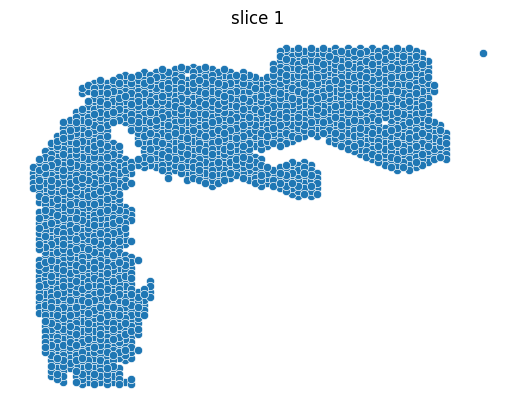

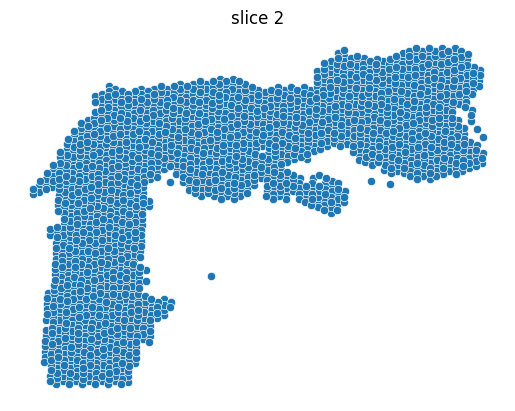

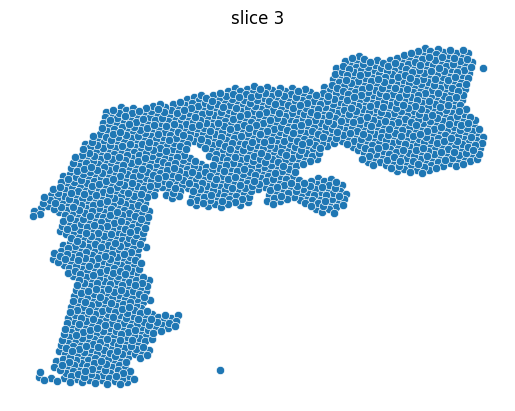

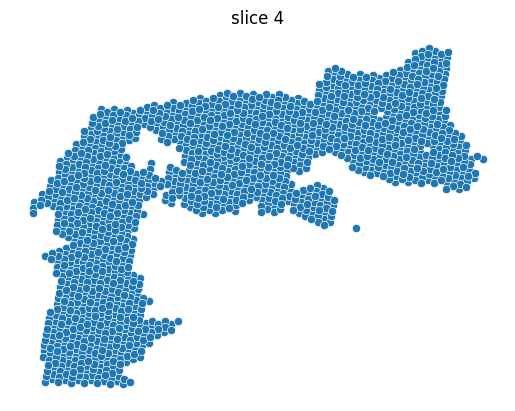

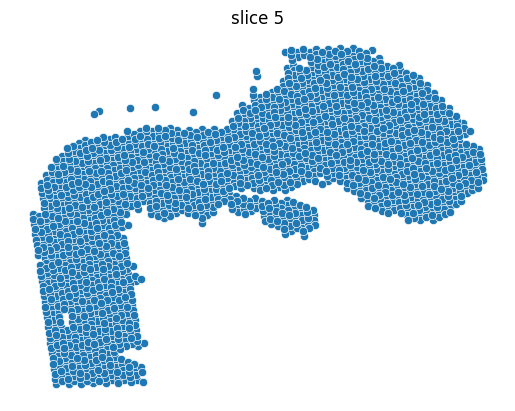

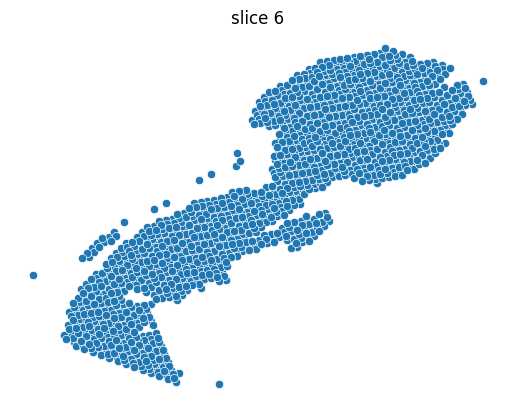

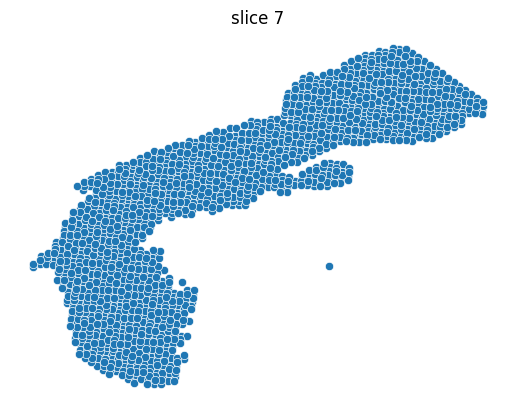

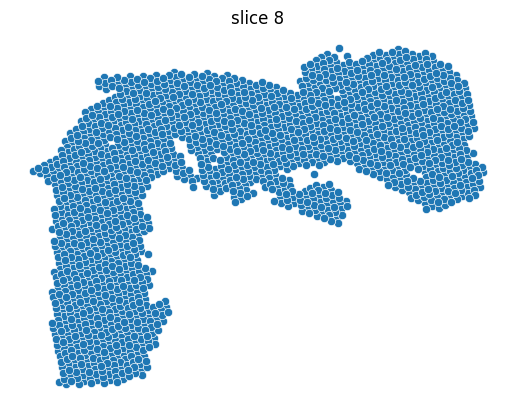

In [ ]:
for i in range(len(new_slices)):
  plot_slice(new_slices[i], "slice " + str(i + 1))
  save_slice(new_slices[i], "slice" + str(i + 1))
  save_h5ad(new_slices[i], "slice" + str(i + 1))

Plot partially overlapping slices

In [ ]:
import matplotlib.patches as mpatches

legend_title = 'Embryo Layer'
layer_color = {'layer{0}'.format(i+1): sns.color_palette()[i] for i in range(3)}

def plot_overlap(adata):
  for i in range(len(slices)):
    plt.scatter(slices[i].obsm['spatial'][:, 0], slices[i].obsm['spatial'][:, 1], linewidth=0, s=100, marker='.', c = colors)
  plt.legend()
  plt.axis('off')

Plot the 3D construction of the 2D data

In [ ]:
def plot_3d(slices):
  dfs = []

  for i, L in enumerate(slices):
    df = pd.DataFrame(L.obsm['spatial'], columns=['x', 'y'])
    df['z'] = i * 10
    df['label'] = "Slice " + str(i + 1)
    dfs.append(df)

  df = pd.concat(dfs)
  fig = px.scatter_3d(df, x='x', y='y', z='z', color='label', color_discrete_sequence = px.colors.sequential.Turbo, title="3D Partial Pairwise Align")
  fig.update_layout(legend_title_text='Annotations', scene={'zaxis': {'autorange':'reversed'}})
  fig.show()

In [ ]:
plot_3d(new_slices)